<a href="https://colab.research.google.com/github/nvsanil/OWG/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1	Problem definition:

Predict denials of denial claims from history data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


2.2	History Data Set 
Data in excel contains three tabs

	Tab-1 contains all attributes of the claims processed except Label   
	Tab-2 contains only Target variable (Label) of each row of Tab-1 data with one common attribute  
	Tab-3 contains all attribute list 

2.3 Data Pre-processing 

1.Read Tab1- data set and Tab-2 Data set and create two panda data frames

2.Merge two data frames into one to place Label properly against each row.

3.Attributes of Tab-1 and Tab-2 are shown below

In [2]:
# Library Imports

import sys
print('python:{}'.format(sys.version))
import scipy as sp
print('scipy:{}'.format(sp.__version__))
import numpy as np
print('numpy:{}'.format(np.__version__))
import pandas as pd
print('pandas:{}'.format(pd.__version__))

python:3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
scipy:1.4.1
numpy:1.18.2
pandas:1.0.3


In [0]:
#% of missing values in each column:
def find_missing_values_func(df):    # Input parameter is dataframe        
    mis_val = df.isnull().sum()        
    mis_val_percent = 100 * df.isnull().sum() / len(df)        
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
    mis_val_table_ren_columns = mis_val_table.rename(        
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
    mis_val_table_ren_columns = mis_val_table_ren_columns[            
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(        
        '% of Total Values', ascending=False).round(1)        
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"               
           "There are " + str(mis_val_table_ren_columns.shape[0]) +              
           " columns that have missing values.")        
    return mis_val_table_ren_columns

def drop_missing_values(df, percentage):
    columns = df.columns
    percent_missing = df.isnull().sum()*100/len(df)
    missing_value_df = pd.DataFrame({'column_name': columns, 'percent_missing':percent_missing})
    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return df


In [4]:
# Data Reads - All required data is in data folders
InputFolder = '/content/gdrive/My Drive/capstone-project/input_data'
OutFolder = '/content/gdrive/My Drive/capstone-project/output_data'
inFile = InputFolder + '/ZCUPClaimDNA-History-Data-v2.xlsx'
df_history_dataset = pd.read_excel(inFile, 
                                   sheet_name='HistoryData',
                                   header=0,
                                   converters={'srlno':np.int64, 
                                               'Claim.Number':str,
                                               'Claim.Line.Number':str,
                                               'Member.ID':str,
                                               'Provider.ID':str,
                                               'Revenue.Code':str,
                                               'Service.Code':str,
                                               'Place.Of.Service.Code':str,
                                               'Procedure.Code':str,
                                               'Diagnosis.Code':str,
                                               'Claim.Charge.Amount':np.float64,
                                               'Denial.Reason.Code':str,
                                               'In.Out.Of.Network':str,
                                               'Subscriber.Payment.Amount':np.float64,
                                               'Provider.Payment.Amount':np.float64,
                                               'Claim.Type':str,
                                               'Claim.Subscriber.Type':str,
                                               'Claim.Current.Status':str,
                                               'Network.ID':str,
                                               'Agreement.ID':str
                                              })
df_labels_dataset = pd.read_excel(inFile, 
                                  sheet_name='Accept-Denial-Label', 
                                  header=0,
                                  converters={'srlno':np.int64, 
                                              'Label':np.int64
                                             })

df_data = pd.merge(df_history_dataset, df_labels_dataset, on='Srlno')

df_data_copy = df_data.copy()

print(df_history_dataset.head())
print(df_labels_dataset.head())

print(df_history_dataset.describe())
print(df_labels_dataset.describe())

print(df_data.head())
print(df_data.describe())

   Srlno Claim.Number  ...    Network.ID  Agreement.ID
0      1     28849991  ...  P00000000002  FH001310QB01
1      2     81404290  ...  P00000000007  FH002451QPD1
2      3     81404290  ...  P00000000007  FH002451QPD1
3      4     81404290  ...  P00000000007  FH002451QPD1
4      5     81404290  ...  P00000000007  FH002451QPD1

[5 rows x 20 columns]
   Srlno  Label
0      1      0
1      2      0
2      3      0
3      4      0
4      5      0
               Srlno  ...  Provider.Payment.Amount
count  472559.000000  ...            472559.000000
mean   236280.000000  ...               299.664982
std    136416.177266  ...              2651.754222
min         1.000000  ...                 0.000000
25%    118140.500000  ...                 0.000000
50%    236280.000000  ...                 0.000000
75%    354419.500000  ...                 0.000000
max    472559.000000  ...            491735.224680

[8 rows x 4 columns]
               Srlno          Label
count  472559.000000  472559.00000

2.4 Find Shape and data type 

In [5]:
print(df_data.shape)
dataTypeSeries = df_data.dtypes
print(dataTypeSeries)

columnsWiseMissingValue = find_missing_values_func(df_data)
print(columnsWiseMissingValue)

(472559, 21)
Srlno                          int64
Claim.Number                  object
Claim.Line.Number             object
Member.ID                     object
Provider.ID                   object
Revenue.Code                  object
Service.Code                  object
Place.Of.Service.Code         object
Procedure.Code                object
Diagnosis.Code                object
Claim.Charge.Amount          float64
Denial.Reason.Code            object
In.Out.Of.Network             object
Subscriber.Payment.Amount    float64
Provider.Payment.Amount      float64
Claim.Type                    object
Claim.Subscriber.Type         object
Claim.Current.Status          object
Network.ID                    object
Agreement.ID                  object
Label                          int64
dtype: object
Your selected dataframe has 21 columns.
There are 1 columns that have missing values.
              Missing Values  % of Total Values
Claim.Number          174023               36.8


2.5	Target Value (Label) setting and cleaning

2.5.1    We will consider following valid Denial.Reason.Code F13, J8G, JO5, JB8, JE1, JC9, JF1, JF9, JG1, JPA and JES
The goal is to develop predictive model to predict claims that would be denied with the above Denial.Reason.Code only. Any row with non-valid Denial.Reason.Code will be considered as garbage that need to be deleted

Rows with label zero (0) without any Denial.Reason.Code (blank)  should be kept

In [6]:
  print(df_data.groupby('Denial.Reason.Code')['Denial.Reason.Code'].count())

  validReasonCodes = ['F13', 'J8G', 'JO5', 'JB8', 'JE1', 'JC9', 'JF1', 'JF9', 'JG1', 'JPA', 'JES', ' '] 
  # added a ' ' since there are valid rows with a space in data cells for Denial Reason Code for claims that are approved
  df_data=df_data[(df_data['Denial.Reason.Code'].isin(validReasonCodes))]

  print(df_data.groupby('Denial.Reason.Code')['Denial.Reason.Code'].count())

Denial.Reason.Code
       326030
104        44
17          3
18          1
19        242
        ...  
TF1      1031
TR2        22
UM0         2
UM1        28
UM2         7
Name: Denial.Reason.Code, Length: 259, dtype: int64
Denial.Reason.Code
       326030
F13      1068
J8G       382
JB8       128
JC9        49
JE1        33
JES        50
JF1         4
JF9        98
JG1        10
JO5       105
JPA        44
Name: Denial.Reason.Code, dtype: int64


2.5.2   Check distribution of Label in terms of percentage 0/1

In [7]:
df_data.shape

(328001, 21)

In [8]:
distLabels = (df_data['Label'].value_counts()/ df_data['Label'].count())*100
print('Distribution:\n{}'.format(distLabels))

Distribution:
0    99.399087
1     0.600913
Name: Label, dtype: float64


2.5.3   Find number of  distinct valid Denial.Reason.Code

In [9]:
print(df_data['Denial.Reason.Code'].unique())

[' ' 'JB8' 'J8G' 'F13' 'JF1' 'JE1' 'JES' 'JO5' 'JG1' 'JPA' 'JC9' 'JF9']


2.6	Handling Predictor Variables
Predictors variables ( All input variables except Target variable)  that are used to predict the 'Target Variable'.


2.6.1  Identify

•	continuous numeric value
•	tag/code value
•	Other columns ID type.

In [10]:
df_data.dtypes

Srlno                          int64
Claim.Number                  object
Claim.Line.Number             object
Member.ID                     object
Provider.ID                   object
Revenue.Code                  object
Service.Code                  object
Place.Of.Service.Code         object
Procedure.Code                object
Diagnosis.Code                object
Claim.Charge.Amount          float64
Denial.Reason.Code            object
In.Out.Of.Network             object
Subscriber.Payment.Amount    float64
Provider.Payment.Amount      float64
Claim.Type                    object
Claim.Subscriber.Type         object
Claim.Current.Status          object
Network.ID                    object
Agreement.ID                  object
Label                          int64
dtype: object

2.6.2  Find

In [11]:
print(df_data['Revenue.Code'].unique())
print(df_data['Service.Code'].unique())
print(df_data['Diagnosis.Code'].unique())

['128' '24' '250' '258' '271' '300' '301' '305' '306' '307' '309' '420'
 '424' '430' '434' '440' '444' '636' '351' '324' '352' '410' '730' '361'
 '302' '320' '350' '390' '274' '370' '921' '450' '915' '912' '126' '124'
 '914' '771' '483' '913' '740' '121' '402' '905' '341' '343' '482' '762'
 '949' '431' '421' '761' '359' '333' '943' '441' '433' '272' '490' '710'
 '278' '259' '750' '312' '510' '360' '637' '329' '206' '200' '460' '481'
 '270' '275' '480' '276' '611' '310' '314' '261' '369' '920' '940' '941'
 '911' '919' '917' '111' '260' '403' '279' '391' '918' '801' '999' '311'
 '610' '612' '401' '323' '344' '731' '981' '412' '812' '127' '322' '819'
 '404' '829' '131' '633' '615' '335' '614' ' ' '922' '822' '400' '732'
 '25' '929' '948' '942' '622' '616' '342' '129' '635' '634' '118' '331'
 '443' '255' '136' '134' '254' '117' '249' '100' '122' '171' '720' '210'
 '723' '821' '722' '471' '112' '172' '900' '916' '123' '120' '618' '174'
 '205' '790' 'XXXX' '173' '831' '901' '413' '832' '811'

2.6.3  Handling Categorical Values

In [12]:
#2.6.3.1 Clubbing of Category Value (1 ,2,3 – High , Medium , Low possibility group respectively)

# Revenue Code
High_Revenue_Code = ["810", "811", "124", "261", "260", "331", "914", "174", "634", "173", "682", "126", "128", "172", "127", "200", "821", "134", "302", "740", "249", "270", "771", "361", "310", "434"]
Medium_Revenue_Code= ["210", "275", "122", "610", "206", "258", "444", "278", "117", "259", "121", "112", "276", "731", "750", "460", "360", "271", "730", "307", "424", "370", "250", "410", "940", "305", "350", "921", "480", "111", "351", "920", "636", "309", "300", "390", "301", "450", "440", "306", "311", "324", "710", "341", "272", "343", "942", "171", "482", "420", "490", "483", "312", "481", "352", "510", "402", "320", "720", "762", "761", "430", "403"]

df_data.loc[df_data['Revenue.Code'].isin(High_Revenue_Code), 'Revenue.Code.Group'] = 1
df_data.loc[df_data['Revenue.Code'].isin(Medium_Revenue_Code), 'Revenue.Code.Group' ] = 2
df_data.loc[~df_data['Revenue.Code'].isin(High_Revenue_Code + Medium_Revenue_Code), 'Revenue.Code.Group'] = 3
print(df_data['Revenue.Code.Group'].value_counts())

2.0    281326
3.0     30655
1.0     16020
Name: Revenue.Code.Group, dtype: int64


In [13]:
df_data.head(5)

,Srlno,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,In.Out.Of.Network,Subscriber.Payment.Amount,Provider.Payment.Amount,Claim.Type,Claim.Subscriber.Type,Claim.Current.Status,Network.ID,Agreement.ID,Label,Revenue.Code.Group
0,1,28849991,1,9583423,FA0001411002,128,RR8I,,,V5789,19356.960000,,I,0.0,15036.21,M,H,2,P00000000002,FH001310QB01,0,1.0
1,2,81404290,1,25210465,FA0001411002,24,AL7I,,A0205,V5789,0.000000,,I,0.0,0.00,M,H,91,P00000000007,FH002451QPD1,0,3.0
3,4,81404290,3,25210465,FA0001411002,250,AL7I,,,V5789,2262.097800,,I,0.0,0.00,M,H,91,P00000000007,FH002451QPD1,0,2.0
4,5,81404290,4,25210465,FA0001411002,258,AL7I,,,V5789,284.712735,,I,0.0,0.00,M,H,91,P00000000007,FH002451QPD1,0,2.0
6,7,81404290,6,25210465,FA0001411002,271,AL7I,,,V5789,38.146050,,I,0.0,0.00,M,H,91,P00000000007,FH002451QPD1,0,2.0


In [14]:
# Service Code
High_Service_Code = ["UNI", "RL8Y", "RM8W", "DU7O", "IH7O", "RM8I", "RI7Y", "SB7W", "GB7A", "NI7I", "OVV", "RM9I", "RR8I", "IMY", "RT8I", "RY8W", "RY7I", "IC7I", "SU7A", "ER7I"]
Medium_Service_Code = ["TO7W", "TE7O", "CC7I", "HV7I", "MR7O", "IN7I", "AL7I", "DI7O", "CT8Y", "RB7W", "RV8W", "CT7I", "RB8I", "RK8Y", "RB7I", "OE7I", "RY8I", "OP7O", "LA7O", "NS7I", "CL7O", "MR7Y", "ER7O", "CT7Y", "CT7O", "RA7O", "MD7O", "TH7O"]
df_data.loc[df_data['Service.Code'].isin(High_Service_Code), 'Service.Code.Group'] = 1
df_data.loc[df_data['Service.Code'].isin(Medium_Service_Code), 'Service.Code.Group'] = 2
df_data.loc[~df_data['Service.Code'].isin(High_Service_Code + Medium_Service_Code), 'Service.Code.Group'] = 3

print(df_data['Service.Code.Group'].value_counts())

2.0    263130
1.0     41143
3.0     23728
Name: Service.Code.Group, dtype: int64


In [15]:
# Diagnosis Code
High_Diagnosis_Code = ["2929", "29690", "V202", "29663", "29622", "9962", "67524", "5193", "V045", "29530", "7999", "430", "29664", "5711", "79095", "30411", "29189", "6162", "29570", "29630", "29644", "5289", "20240", "99741", "37943", "9352", "V08", "V1255", "V5041", "80225", "6108", "57480", "5070", "V6284", "52460", "8024", "99681", "V3101"]
Medium_Diagnosis_Code = ["75249", "71100", "29660", "78722", "2273", "6868", "64844", "73671", "37730", "61804", "6146", "V5831", "2989", "7503", "72992", "29181", "2452", "80841", "8250", "66111", "9950", "29640", "9220", "99563", "7222", "29650", "65811", "29632", "52403", "99676", "27541", "4168", "2102", "2182", "0090", "34691", "5738", "68100", "2776", "1809", "5362", "29633", "29680", "61801", "34290", "72990", "64981", "2912", "6170", "1746", "6183", "78499", "52489", "53551", "42823", "30501", "3682", "V3000", "7226", "64303", "24200", "8832", "57470", "9726", "29689", "5409", "8248", "73730", "2181", "57450", "85011", "6121", "64893", "6253", "99883", "96501", "193", "53190", "6268", "42841", "226", "57400", "4280", "1960", "69589", "2777", "2180", "1743", "1742", "179", "6110", "6272", "60001", "53240", "V552", "6827", "5559", "6185", "8600", "81305", "07054", "0479", "45340", "6824", "5551", "38611", "5941", "2271", "72888", "80703", "6227", "6823", "6184", "4377", "62212", "72210", "2891", "5533", "5722", "8246", "V510", "6111", "2572", "2720", "5789", "55321", "3688", "2189", "2410", "1541", "5856", "65231", "6262", "5609", "5641", "7455", "1550", "2875", "220", "78720", "30300", "81209", "566", "99812", "56032", "4321", "1745", "78630", "5119", "5400", "34590", "57511", "30400", "4940", "5770", "25201", "75612", "78057", "6181", "61179", "1749", "27651", "73819", "78799", "00845", "56400", "99832", "5712", "4589", "42741", "78701", "4659", "57420", "30500", "7804", "30391", "5693", "1744", "6100", "41401", "55092", "5589", "61172", "99674", "1741", "61189", "49392", "82525", "9351", "V5331", "2910", "78901", "5303", "80126", "6271", "2141", "7842", "59970", "25002", "78791", "1748", "8500", "78900", "217", "1985", "79389", "42731", "78906", "99673", "7384", "78009", "650", "6210", "51881", "81342", "78659", "72402", "56210", "2851", "49322", "486", "55090", "2920", "56211", "V700", "57410", "4359", "5921", "03849", "78903", "53550", "7840", "2330", "64403", "33819", "6826", "78907", "V5811", "6202", "78652", "431", "V6759", "78079", "72252", "7802", "2809", "V7651", "7295", "78650", "65421", "0389", "43491", "78909", "2859", "V7611", "V7612", "3669", "V5789", "V571"]

df_data.loc[df_data['Diagnosis.Code'].isin(High_Diagnosis_Code), 'Diagnosis.Code.Group'] = 1
df_data.loc[df_data['Diagnosis.Code'].isin(Medium_Diagnosis_Code), 'Diagnosis.Code.Group'] = 2,
df_data.loc[~df_data['Diagnosis.Code'].isin(High_Diagnosis_Code + Medium_Diagnosis_Code), 'Diagnosis.Code.Group'] = 3

print(df_data['Diagnosis.Code.Group'].value_counts())

2.0    165015
3.0    160775
1.0      2211
Name: Diagnosis.Code.Group, dtype: int64


In [16]:
print(df_data['Revenue.Code.Group'].unique())
print(df_data['Service.Code.Group'].unique())
print(df_data['Diagnosis.Code.Group'].unique())

[1. 3. 2.]
[1. 2. 3.]
[2. 1. 3.]


2.6.4          Find column wise missing value in percentage  

In [17]:
percent_missing = df_data.isnull().sum() *100 / len(df_data)
print(percent_missing)

Srlno                         0.000000
Claim.Number                 53.055631
Claim.Line.Number             0.000000
Member.ID                     0.000000
Provider.ID                   0.000000
Revenue.Code                  0.000000
Service.Code                  0.000000
Place.Of.Service.Code         0.000000
Procedure.Code                0.000000
Diagnosis.Code                0.000000
Claim.Charge.Amount           0.000000
Denial.Reason.Code            0.000000
In.Out.Of.Network             0.000000
Subscriber.Payment.Amount     0.000000
Provider.Payment.Amount       0.000000
Claim.Type                    0.000000
Claim.Subscriber.Type         0.000000
Claim.Current.Status          0.000000
Network.ID                    0.000000
Agreement.ID                  0.000000
Label                         0.000000
Revenue.Code.Group            0.000000
Service.Code.Group            0.000000
Diagnosis.Code.Group          0.000000
dtype: float64


2.6.5	       Find Duplicate rows and drop those

In [18]:
df_data.shape
df_data=df_data.drop_duplicates(subset=None, keep = 'first', inplace=False)
df_data.shape

(328001, 24)

2.6.6 Drop columns having 60% and more NULL values

In [19]:
columnsWiseMissingValue = find_missing_values_func(df_data)
print(columnsWiseMissingValue)

df_data.dropna(thresh=len(df_data)*0.4, axis=1, inplace=True)

columnsWiseMissingValue = find_missing_values_func(df_data)
print(columnsWiseMissingValue)

Your selected dataframe has 24 columns.
There are 1 columns that have missing values.
              Missing Values  % of Total Values
Claim.Number          174023               53.1
Your selected dataframe has 24 columns.
There are 1 columns that have missing values.
              Missing Values  % of Total Values
Claim.Number          174023               53.1


2.6.7 Make sure all accepted code (Label=0)  must not have any denial-code-reason

In [20]:
print(df_data.groupby(['Denial.Reason.Code', 'Label'])['Denial.Reason.Code'].count())

# Replacing white space in Denial Reason Code by nan
#df_data.replace(to_replace=' \s*', value=np.NaN, regex=True,inplace=True)
df_data.replace(to_replace=' ', value=np.NaN)
df_data.replace(to_replace='', value=np.NaN)
df_data.replace(to_replace='\s', value=np.NaN)

#df_data.replace(to_replace='\s*', value=np.NaN, regex=True,inplace=True)

print(df_data.groupby(['Denial.Reason.Code','Label'])['Denial.Reason.Code'].count())

percent_missing = df_data.isnull().sum() *100 / len(df_data)
print(percent_missing)

Denial.Reason.Code  Label
                    0        326030
F13                 1          1068
J8G                 1           382
JB8                 1           128
JC9                 1            49
JE1                 1            33
JES                 1            50
JF1                 1             4
JF9                 1            98
JG1                 1            10
JO5                 1           105
JPA                 1            44
Name: Denial.Reason.Code, dtype: int64
Denial.Reason.Code  Label
                    0        326030
F13                 1          1068
J8G                 1           382
JB8                 1           128
JC9                 1            49
JE1                 1            33
JES                 1            50
JF1                 1             4
JF9                 1            98
JG1                 1            10
JO5                 1           105
JPA                 1            44
Name: Denial.Reason.Code, dtype: int64
Srlno 

2.6.8	       Drop all useless columns – not required for Machine learning

In [0]:
Useless_columns = ['Srlno', 'Revenue.Code', 'Service.Code', 'Diagnosis.Code']
df_data.drop(Useless_columns, axis = 1, inplace=True) 

In [0]:
# rearrange columns - so label will be in the last column
df_data = df_data[['Claim.Number', 'Claim.Line.Number', 'Member.ID', 'Provider.ID',
       'Place.Of.Service.Code', 'Procedure.Code', 'Claim.Charge.Amount',
       'Denial.Reason.Code', 'In.Out.Of.Network', 'Subscriber.Payment.Amount',
       'Provider.Payment.Amount', 'Claim.Type', 'Claim.Subscriber.Type',
       'Claim.Current.Status', 'Network.ID', 'Agreement.ID', 
       'Revenue.Code.Group', 'Service.Code.Group', 'Diagnosis.Code.Group', 'Label',]]


2.6.9	       Check distribution of Label in terms of percentage 0/1

In [23]:
distLabels = (df_data['Label'].value_counts()/ df_data['Label'].count())*100
print(distLabels)

0    99.399087
1     0.600913
Name: Label, dtype: float64


2.6.10	       Write processed and clean data set  to a csv file

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328001 entries, 0 to 472558
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Claim.Number               153978 non-null  object 
 1   Claim.Line.Number          328001 non-null  object 
 2   Member.ID                  328001 non-null  object 
 3   Provider.ID                328001 non-null  object 
 4   Place.Of.Service.Code      328001 non-null  object 
 5   Procedure.Code             328001 non-null  object 
 6   Claim.Charge.Amount        328001 non-null  float64
 7   Denial.Reason.Code         328001 non-null  object 
 8   In.Out.Of.Network          328001 non-null  object 
 9   Subscriber.Payment.Amount  328001 non-null  float64
 10  Provider.Payment.Amount    328001 non-null  float64
 11  Claim.Type                 328001 non-null  object 
 12  Claim.Subscriber.Type      328001 non-null  object 
 13  Claim.Current.Status       32

In [0]:
df_data.to_csv(OutFolder+"/CleanData.csv",index=False)

In [0]:
# 10 columns are category type (discrete tag value)
# ["Revenue.Code", "Service.Code", "Procedure.Code", "Diagnosis.Code", "In.Out.Of.Network", "Claim.Type", 
#          "Claim.Subscriber.Type", "Claim.Current.Status", "Place.Of.Service.Code", "Denial.Reason.Code"]
categorical_columns = ["Revenue.Code.Group", "Service.Code.Group", "Procedure.Code", "Diagnosis.Code.Group", "In.Out.Of.Network", "Claim.Type", "Claim.Subscriber.Type", "Claim.Current.Status", "Place.Of.Service.Code", "Denial.Reason.Code", 'Label']


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


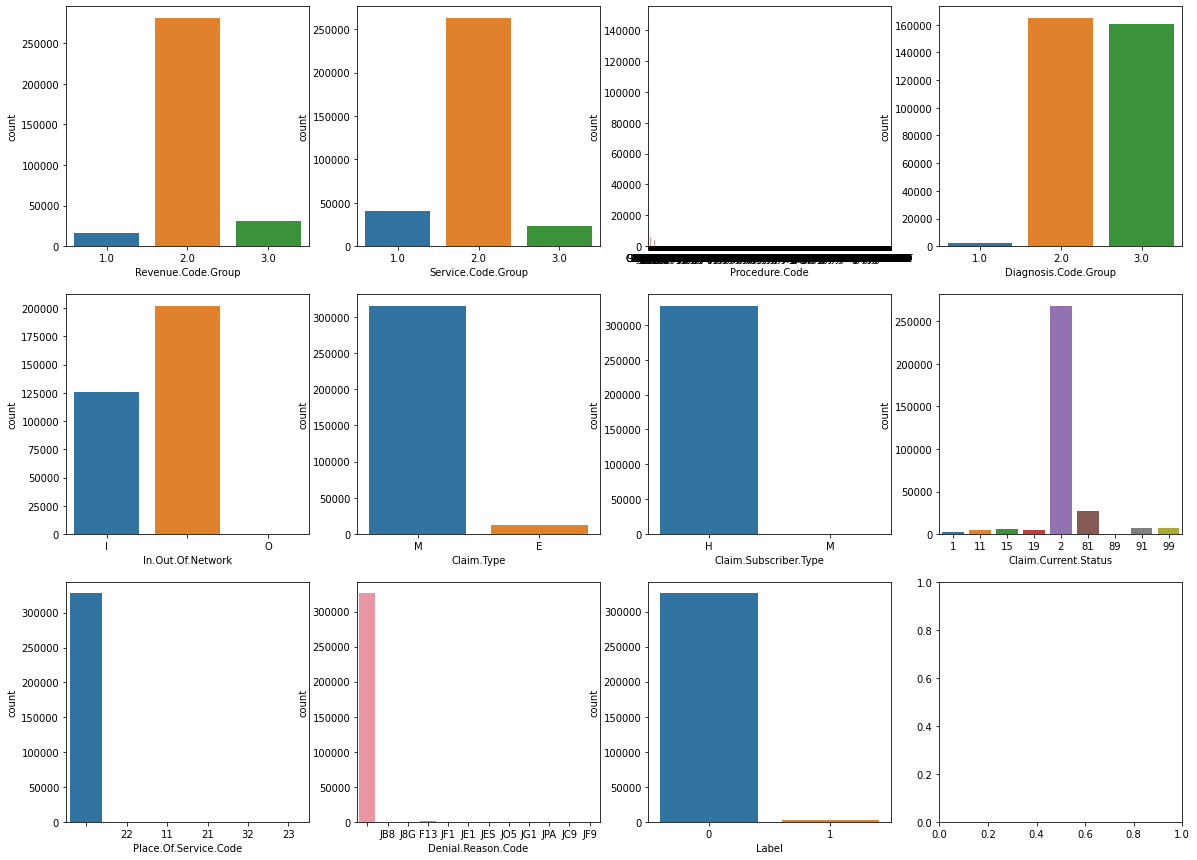

In [28]:
# Analyzing Categorical Variables

fig, ax = plt.subplots(3, 4, figsize=(20, 15))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df_data[variable], ax=subplot) 

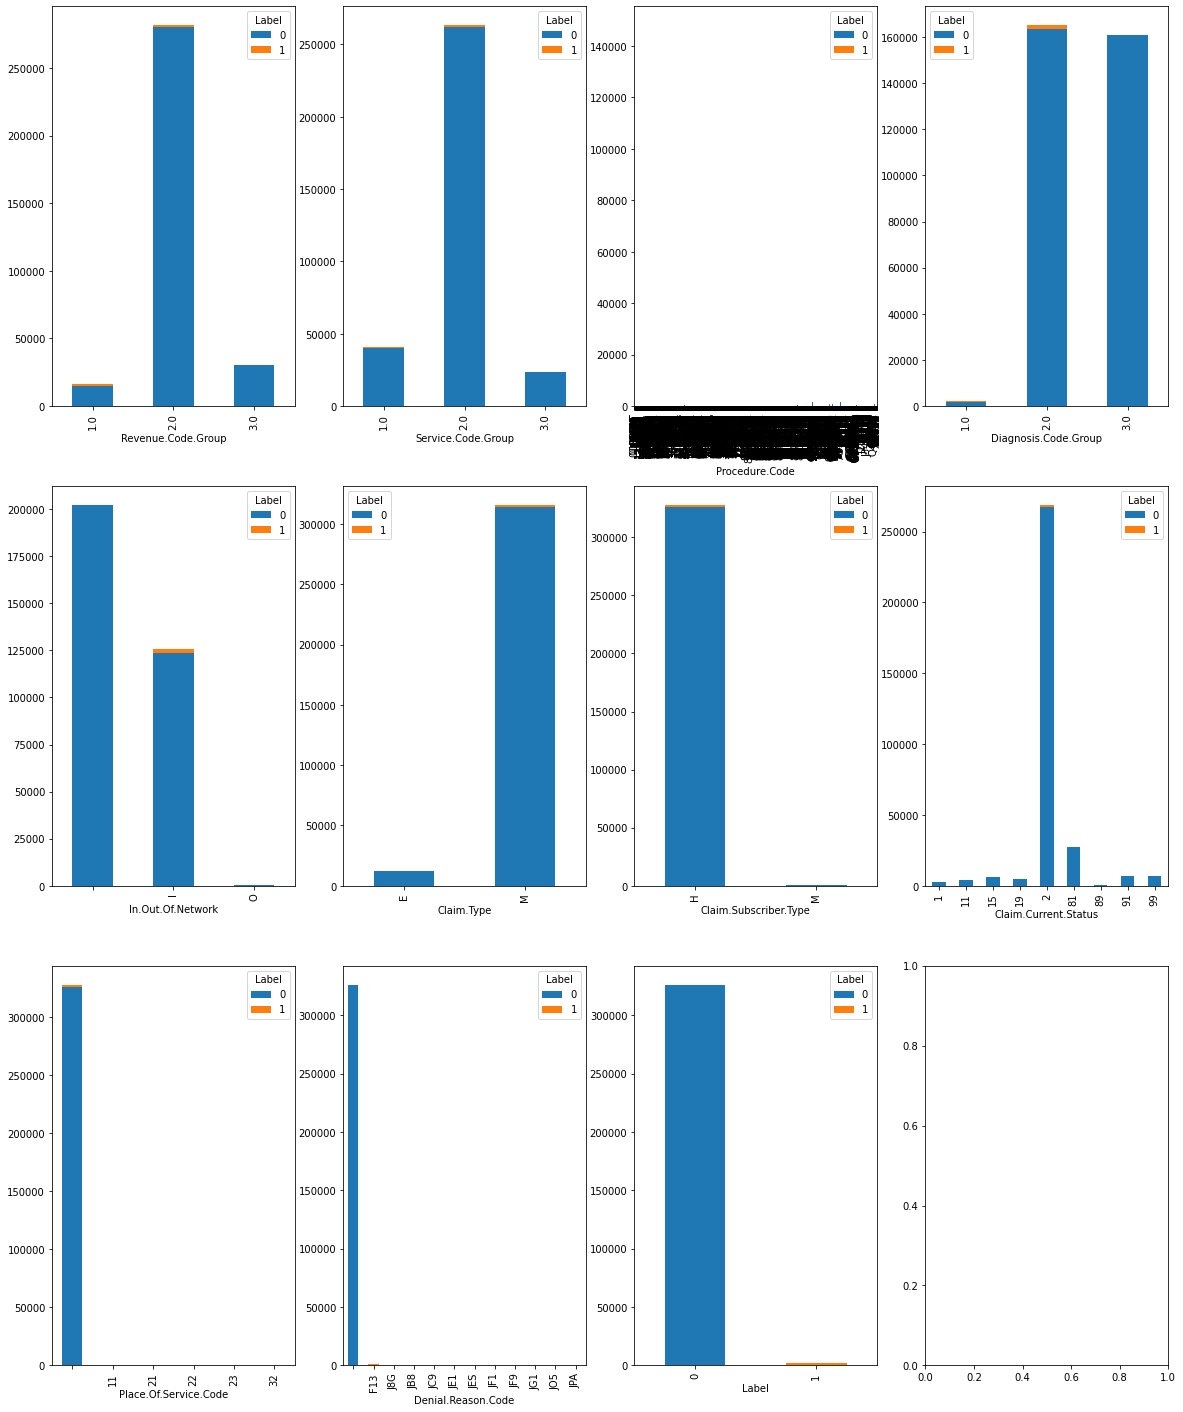

In [29]:
# Compare categorical variable with 'Label'
fig, ax = plt.subplots(3, 4, figsize=(20, 25))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    pd.crosstab(df_data[variable], df_data['Label']).plot(kind='bar', ax=subplot, stacked=True)

In [0]:
# 3 columns are numeric type (continuous numeric value)
# ["Claim.Charge.Amount", "Subscriber.Payment.Amount", "Provider.Payment.Amount"]
# But "Subscriber.Payment.Amount" column has all zeros
numerical_columns = ['Claim.Charge.Amount', 'Provider.Payment.Amount']

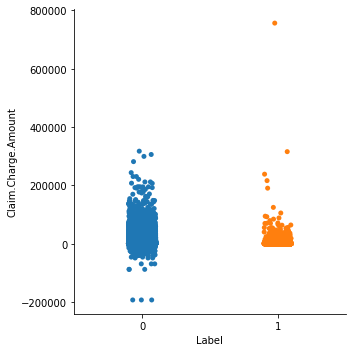

In [33]:
sns.catplot(x='Label', y='Claim.Charge.Amount', data=df_data)

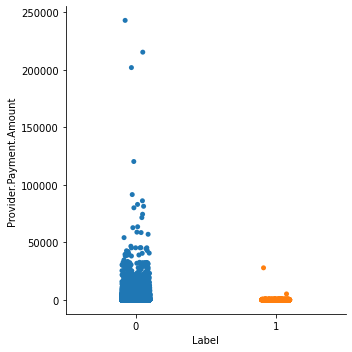

In [34]:
sns.catplot(x='Label', y='Provider.Payment.Amount', data=df_data)